In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Predictors

Predictors are something that can be created separately from this package if desired, however, for convenience we provide a sample set of predictors as well as some convenience methods for creating new ones.

The sample set of predictors can be loaded in with

In [2]:
import matplotlib.pyplot as plt
import LOTUS_regression.predictors as predictors

pred = predictors.load_data('pred_baseline_pwlt.csv')

print(pred[:5])

                enso     solar      qboA      qboB       aod  linear_pre  \
time                                                                       
1979-01-01  0.499274  1.568564 -0.991782 -0.925437 -0.395539   -1.800000   
1979-02-01  0.281624  1.622217 -1.024426 -1.028774 -0.396092   -1.791667   
1979-03-01 -0.070762  1.312212 -1.147750 -0.659631 -0.397189   -1.783333   
1979-04-01  0.219438  1.127112 -1.138165 -0.399319 -0.399997   -1.775000   
1979-05-01  0.291988  1.002103 -1.205567  0.058949 -0.403881   -1.766667   

            linear_post  constant  
time                               
1979-01-01          0.0       1.0  
1979-02-01          0.0       1.0  
1979-03-01          0.0       1.0  
1979-04-01          0.0       1.0  
1979-05-01          0.0       1.0  


The sample set contains 

    * ENSO from http://www.esrl.noaa.gov/psd/enso/mei/table.html
    * Three orthogonal components of the QBO from http://www.geo.fu-berlin.de/met/ag/strat/produkte/qbo/qbo.dat calculated with PCA
    * Solar f10.7 from http://www.spaceweather.ca/data-donnee/sol_flux/sx-5-mavg-eng.php
    * Piecewise linear terms with an inflection at 1997 that are expressed in per decade
    * GloSSAC AOD from https://asdc.larc.nasa.gov/project/GloSSAC/GloSSAC_2.0

These predictors (with the exception of the linear terms) have been scaled to have mean 0 with standard deviation of 1.  Each predictor begins in 1978 and ends at 2021-05.  A constant is also included by default.

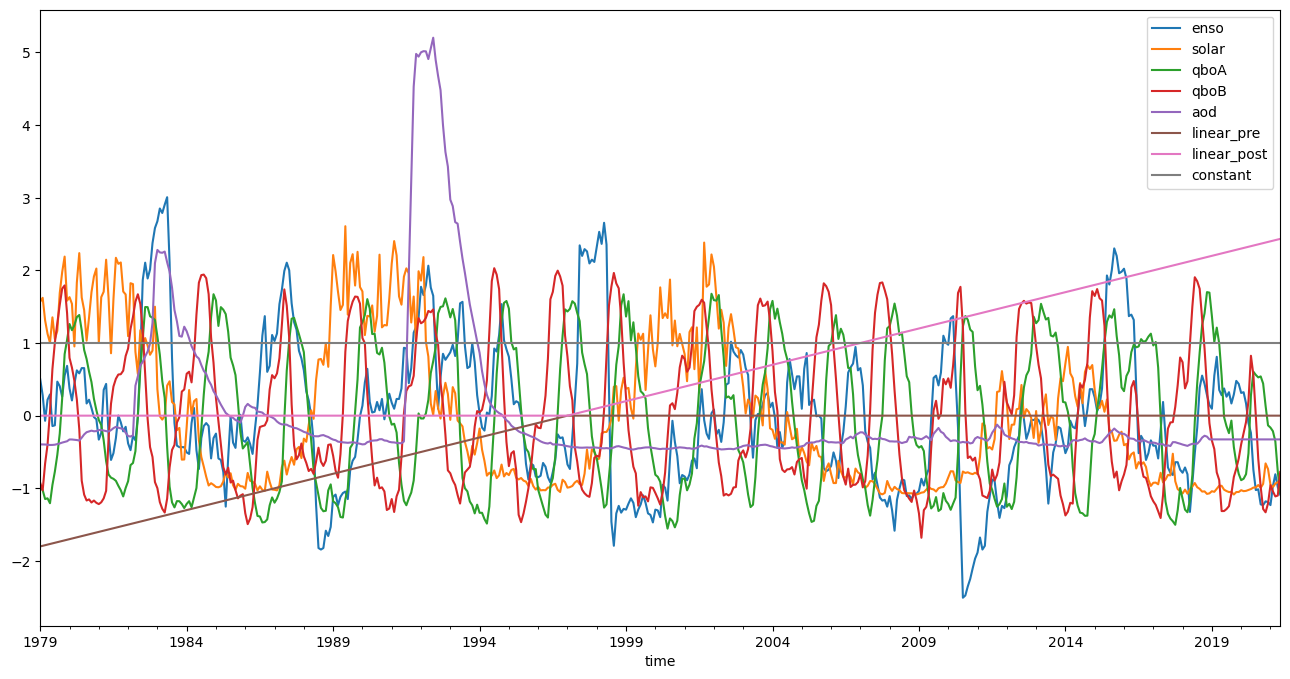

In [3]:
pred.plot(figsize=(16,8))
plt.show()

Three other baseline predictor files are included, `pred_baseline_eesc.csv`, `pred_baseline_ilt.csv`, `pred_baseline_ilt_continuous.csv`. Predictors are similar between the four files with the exception of the linear terms. 

`pred_baseline_eesc.csv` contains two orthogonal components of the EESC calculated using principal component analysis for different mean ages of air instead of the piecewise linear term.

`pred_baseline_ilt.csv` also contains two linear terms, the first is the "pre" term ending at 1997-01-01, and the second is the "post" term beginning at 2000-01-01.  The difference is that multiple constant terms are included which allow the two time periods to be essentially independent of each other.  This is in contrast with the PWLT predictors which force a common value at 1997 

`pred_baseline_ilt_continuous.csv` is a modification of the previous ILT terms where continuity is enforced at the start of the pre period (1997-01-01) and the start of the post period (2000-01-01).  This is done by modifying the pre and post constants to include a linear variation within the gap period.

Functions are also provided to download each individual predictor from its respective source

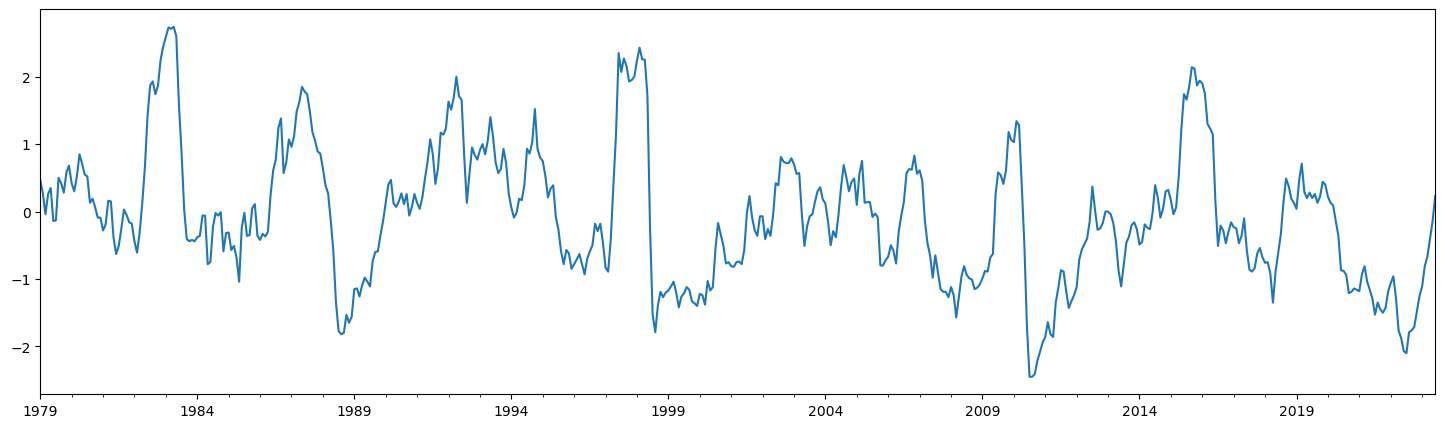

In [4]:
import LOTUS_regression.predictors.download as download

enso = download.load_enso()

enso.plot(figsize=(18, 5))
plt.show()

One final tool included is the ability to create predictors modulated by seasonal components.  This is useful if you are regressing to data that has not been deseasonalized.

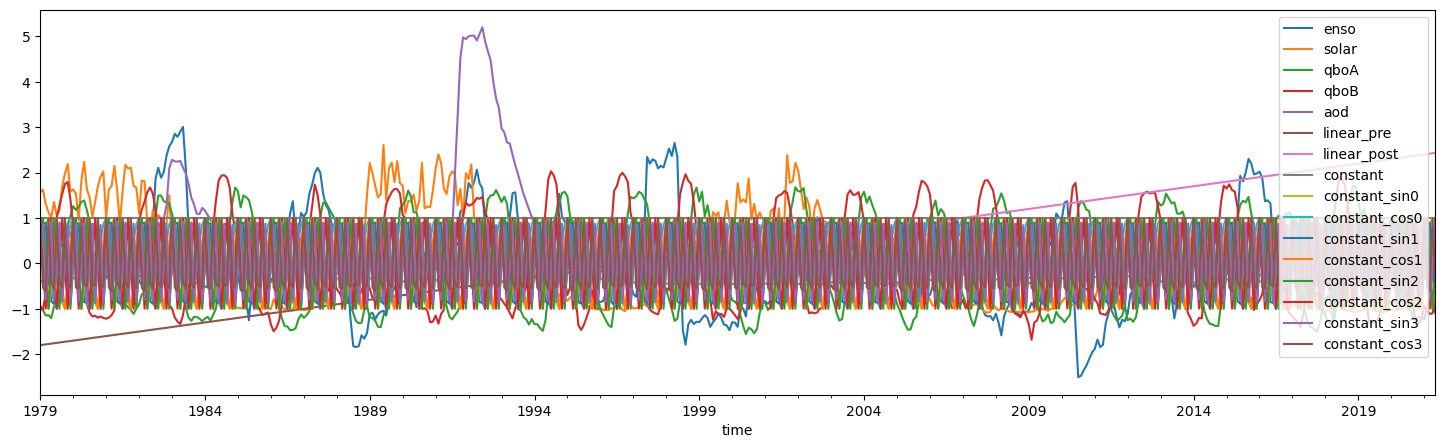

In [5]:
from LOTUS_regression.predictors.seasonal import add_seasonal_components

const_with_seasons = add_seasonal_components(pred, {'constant': 4})

const_with_seasons.plot(figsize=(18, 5))
plt.show()

# Extra Predictors

Some additional predictors are included for testing purposes, these currently are tropopause pressure and the GISS AOD.  The additional predictors can be loaded in with

In [6]:
extra_predictors = predictors.load_data('pred_extra.csv')

and used to modify the standard predictors.  E.g., we can change the GloSSAC AOD to the GISS AOD with

In [7]:
pred['aod'] = extra_predictors['giss_aod']